In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np 
import pandas as pd 
import os
import scanpy as sc 

import sys
sys.path.append('../src')

In [ ]:
# # CONGA mait donor1
# name = 'conga_mait_donor1'
# n_pcs = 32
# model_name = f'esm2_pca{n_pcs}'
# y_path = '/ix3/djishnu/alw399/SLIDE_PLM/data/slide/inputs/10x_200k_donor1_mait_y.csv'
# slide_outs = '/ix3/djishnu/alw399/SLIDE_PLM/data/slide/outputs/10x_200k_donor1_mait/0.01_0.5_out'
# barcodes = pd.read_csv(y_path).index
# y = pd.read_csv(y_path)['is_mait'].values
# adata = sc.read_h5ad('/ix3/djishnu/alw399/SLIDE_PLM/data/conga/toJishnu/10x_200k_donor1.h5ad')
# cdr3a = adata[barcodes, :].obs['cdr3a']
# cdr3b = adata[barcodes, :].obs['cdr3b']

# CONGA mait donor1
name = 'conga_mait_donor1'
n_pcs = 16
model_name = f'pjm_15epochs_pca{n_pcs}'
y_path = '/ix3/djishnu/alw399/SLIDE_PLM/data/slide/inputs/10x_200k_donor1_mait_y.csv'
slide_outs = '/ix3/djishnu/alw399/SLIDE_PLM/data/slide/outputs/10x_200k_donor1_mait/0.01_0.5_out'
barcodes = pd.read_csv(y_path).index
y = pd.read_csv(y_path)['is_mait'].values
adata = sc.read_h5ad('/ix3/djishnu/alw399/SLIDE_PLM/data/conga/toJishnu/10x_200k_donor1.h5ad')
cdr3a = adata[barcodes, :].obs['cdr3a']
cdr3b = adata[barcodes, :].obs['cdr3b']

In [ ]:
# from esm2.Run_ESM2 import * 

# data = load_model()
# model, alphabet, batch_converter = data

# batch_labels = cdr3b.astype(str)
# seq_str_list = cdr3b.astype(str)
# raw_batch = list(zip(batch_labels, seq_str_list))
# cdr3b_embed = get_representations(raw_batch, model, alphabet, batch_converter)

# batch_labels = cdr3a.astype(str)
# seq_str_list = cdr3a.astype(str)
# raw_batch = list(zip(batch_labels, seq_str_list))
# cdr3a_embed = get_representations(raw_batch, model, alphabet, batch_converter)

In [12]:
from pjm.pjm import from_pretrained, build_default_alphabet

alphabet = build_default_alphabet()

# Load encoder
embedder = from_pretrained(
    model_type="mmplm",
    alphabet=alphabet,
    checkpoint_path='/ix/djishnu/alw399/SLIDE_PLM/data/pjm_models/mmplm_15epochs_dim256_ckpt.pth',
)

tokenizer = alphabet.get_batch_converter()

batch_labels = cdr3b.astype(str)
seq_str_list = cdr3b.astype(str)
raw_batch = list(zip(batch_labels, seq_str_list))

labels, strs, tokens = tokenizer(raw_batch)
cdr3b_embed = embedder(tokens)
cdr3b_embed = cdr3b_embed.detach().numpy().reshape(cdr3b_embed.shape[0], -1)


batch_labels = cdr3a.astype(str)
seq_str_list = cdr3a.astype(str)
raw_batch = list(zip(batch_labels, seq_str_list))

labels, strs, tokens = tokenizer(raw_batch)
cdr3a_embed = embedder(tokens)
cdr3a_embed = cdr3a_embed.detach().numpy().reshape(cdr3a_embed.shape[0], -1)


In [14]:
from sklearn.decomposition import PCA

model = PCA(n_components=n_pcs)
model.fit(cdr3b_embed)
cdr3b_embed = model.transform(cdr3b_embed)

model = PCA(n_components=n_pcs)
model.fit(cdr3a_embed)
cdr3a_embed = model.transform(cdr3a_embed)

In [15]:
cdr3b_embed.shape, barcodes.shape

((1109, 16), (1109,))

In [16]:
cdr3b_z1 = pd.DataFrame(cdr3b_embed, index=barcodes, columns=range(n_pcs))
cdr3b_z1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,23.026962,-32.369301,17.857168,7.856310,-6.474576,-4.209102,22.721163,-7.414840,4.735731,-17.104979,-0.816762,-1.952078,8.603200,2.215321,9.678167,-11.028492
1,-45.411278,1.387436,-0.050548,34.010948,18.555286,11.005503,1.600887,3.245930,24.382093,5.031884,6.579464,3.641738,-4.189475,-11.785588,3.221490,3.438843
2,40.170162,4.732183,35.955875,-7.317747,-5.187745,-24.201796,-21.573662,-9.772438,15.268986,10.455276,6.024265,9.247243,17.985916,-11.945567,-6.128509,10.799810
3,-18.316084,-21.628809,38.360256,-5.015376,-3.333538,-11.762943,10.952450,18.303640,-15.292967,14.976022,-19.782400,0.464153,11.598351,-0.668751,22.992998,-13.814917
4,11.468400,51.846725,27.650726,13.929900,-39.292969,8.239447,-13.861437,-15.320484,-11.508433,26.813782,3.111476,-5.094645,8.149368,10.480452,17.517277,15.158293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,32.472164,-30.950788,16.009495,7.550435,-19.632261,-13.800119,25.959078,1.091572,-0.255263,-4.223677,0.770163,16.295864,8.847605,-3.757133,13.382872,-4.729645
1105,-25.221909,-31.787249,-30.906488,-15.224765,-5.015529,7.418849,3.421080,10.458080,7.990422,28.640446,8.834623,-29.720854,-7.082374,2.924457,-13.441177,1.131907
1106,-15.397341,5.499838,6.328482,4.662632,-26.852457,-0.567967,-3.548038,24.012846,17.145117,-18.698582,-3.628210,29.127153,-12.705436,-1.171524,32.597832,3.883898
1107,4.436379,-26.961843,-0.965006,-5.411024,34.803490,-9.126211,2.566341,17.636330,3.077425,7.827033,-4.122108,0.335807,-20.836460,-5.054098,21.796135,-7.391645


In [24]:
from interaction import Interaction

machop = Interaction(
    slide_outs=None, 
    z_matrix=cdr3b_z1,
    plm_embed=cdr3a_embed, 
    y=y,
    interacts_only=False,
    model='LR'
)

machop.get_sig_interactions(fdr=0.6, n_iters=20, thresh=0.5)

Found 0 significant interactions with AUC=0.5


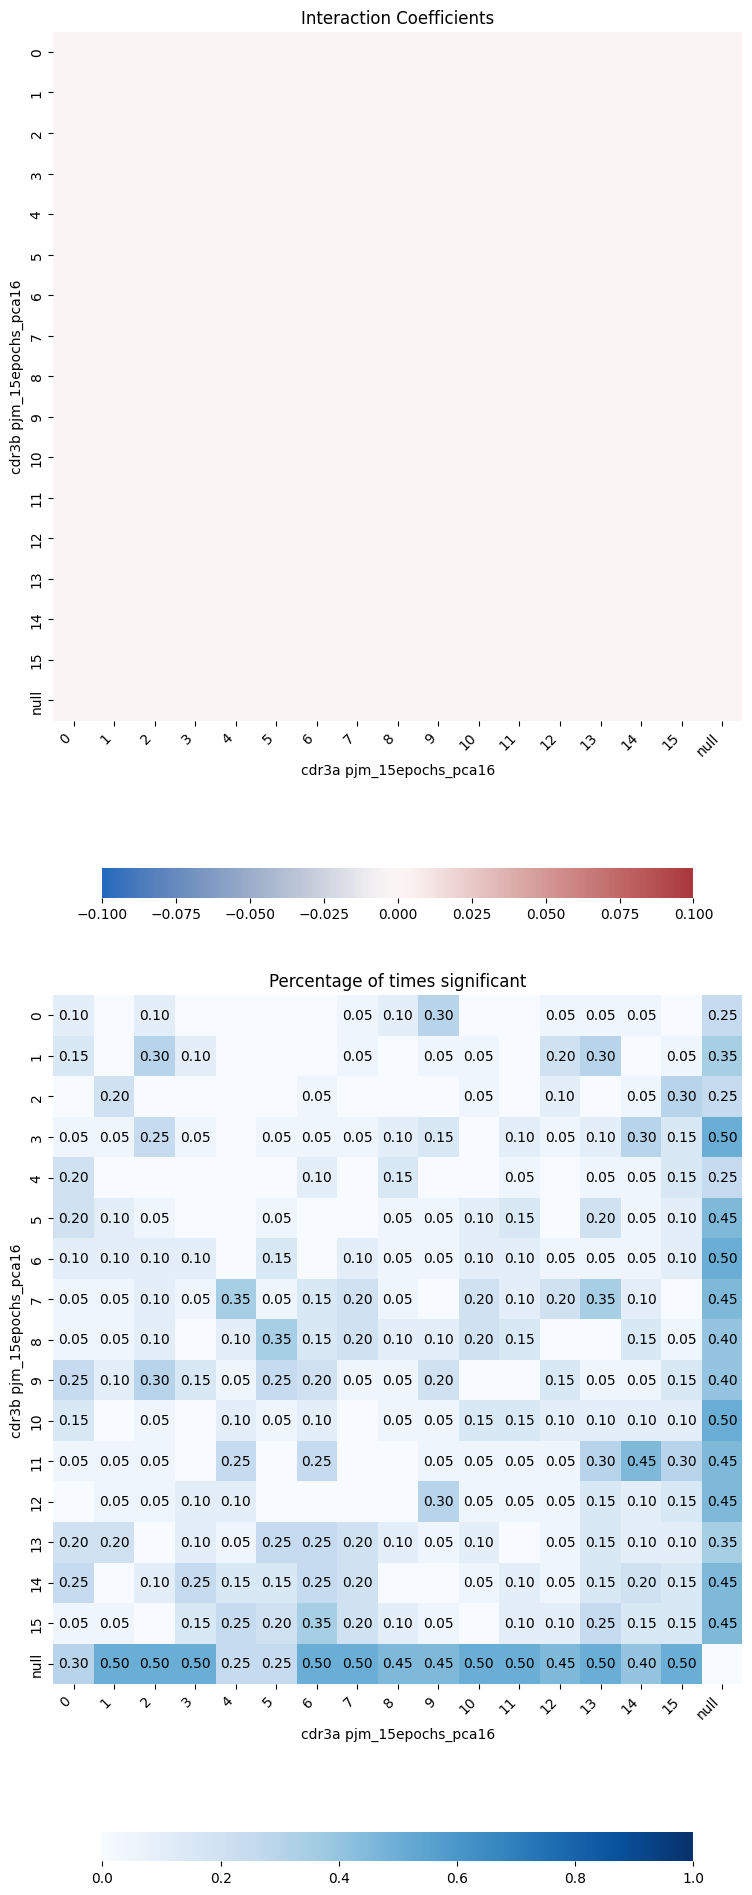

In [25]:
from plotting import show_interactions
show_interactions(machop, save_path=None, z1=f'cdr3b {model_name}', z2=f'cdr3a {model_name}')

In [26]:
cdr3a_z1 = pd.DataFrame(cdr3a_embed, index=barcodes, columns=range(n_pcs))
cdr3a_z1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,73.047997,-12.628589,5.322203,4.717320,19.004955,-21.793228,-19.813217,-0.409539,-13.825393,4.800589,7.888867,8.139223,-7.903155,14.283758,-4.644647,-1.190965
1,76.019524,-15.998805,-17.488943,8.240872,30.491184,-17.563196,7.169283,1.669948,-1.302368,0.922023,18.021353,4.269814,-4.401896,6.525993,8.234642,3.189342
2,27.384600,-55.904434,-25.006702,13.090570,-32.685047,-8.600037,11.284955,-28.300880,-23.436195,-3.671846,4.852470,-6.239782,-21.192501,-12.067012,-5.710477,-10.157104
3,52.289845,33.966400,-26.794344,-3.997936,6.024821,-2.969491,3.727942,5.080254,10.241213,2.061368,25.100880,5.784353,-7.591893,-4.545658,5.224913,-16.586887
4,9.270731,44.382935,-38.210835,4.661474,-12.934003,-4.188233,-15.066435,-15.781099,-1.942722,-19.438616,-0.603441,-7.294583,-13.173823,-4.748866,15.295351,0.535475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,-51.168621,3.498930,44.819134,9.608319,-12.637902,-1.932582,2.917645,-2.887651,-0.687033,-2.942640,10.446922,6.684265,-3.123243,-1.067695,9.948944,8.271809
1105,-11.937716,24.769455,34.846100,8.184328,0.589688,22.363636,-6.709708,-0.589540,13.522996,-10.334449,-13.989017,-11.305761,14.830742,-12.619499,8.182074,6.612953
1106,25.228661,3.814919,48.758575,-27.786148,0.763267,22.217815,-7.930008,9.998184,-4.430341,24.152597,5.621030,-0.050967,27.843695,-9.812695,16.331192,6.765734
1107,24.428259,17.175476,48.104832,-0.941168,-4.306749,23.421051,-4.034145,15.194319,-8.915941,24.074636,-3.911314,4.464671,29.470800,-7.970051,6.366946,0.019558


In [27]:
from interaction import Interaction

machop = Interaction(
    slide_outs=None, 
    z_matrix=cdr3a_z1,
    plm_embed=cdr3b_embed, 
    y=y,
    interacts_only=False,
    model='LR'
)

machop.get_sig_interactions(fdr=0.6, n_iters=20, thresh=0.5)

Found 0 significant interactions with AUC=0.5


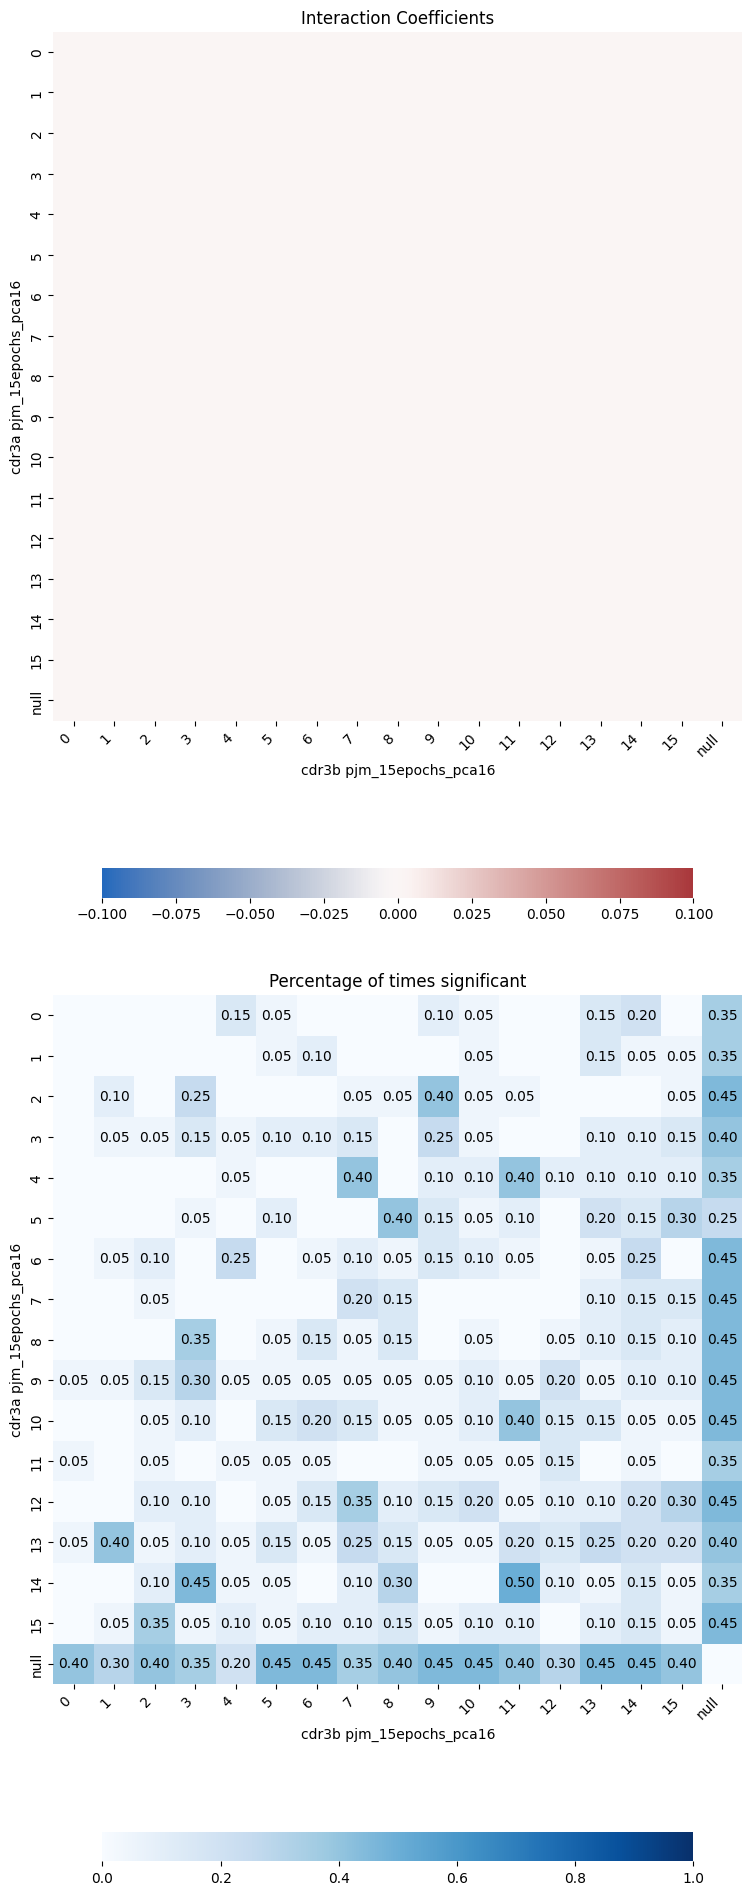

In [28]:
show_interactions(machop, save_path=None, z2=f'cdr3b {model_name}', z1=f'cdr3a {model_name}')